In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [68]:
df = pd.read_csv('travel_insurance/train.csv')

In [69]:
df.head()

,Customer Id,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,3JUN0VW6F043,34,Private Sector/Self Employed,Yes,1300000,6,0,Yes,No,No
1,VLHY2ABIR4QL,28,Private Sector/Self Employed,Yes,750000,7,0,Yes,No,No
2,6E3F7UNXYNFF,28,Private Sector/Self Employed,Yes,750000,6,0,Yes,No,No
3,JJ8R0ZRYWR31,32,Government Sector,Yes,800000,6,1,No,No,No
4,2WGFUEX6IEHM,34,Private Sector/Self Employed,Yes,700000,4,1,No,No,No


In [70]:
df.TravelInsurance.value_counts()

No     1031
Yes     559
Name: TravelInsurance, dtype: int64

In [71]:
df2 = df.copy()

In [72]:
df2.drop('Customer Id', axis=1, inplace=True)

In [73]:
feature_list = ['GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']
for i in feature_list:
    df2[i].replace({'No':0, 'Yes':1}, inplace=True)
df2['Employment Type'].replace({'Government Sector':0, 'Private Sector/Self Employed':1}, inplace=True)

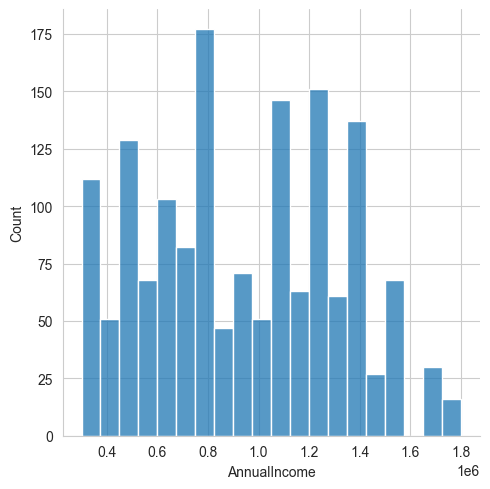

In [74]:
sns.displot(df2, x='AnnualIncome',kind='hist', bins=20)

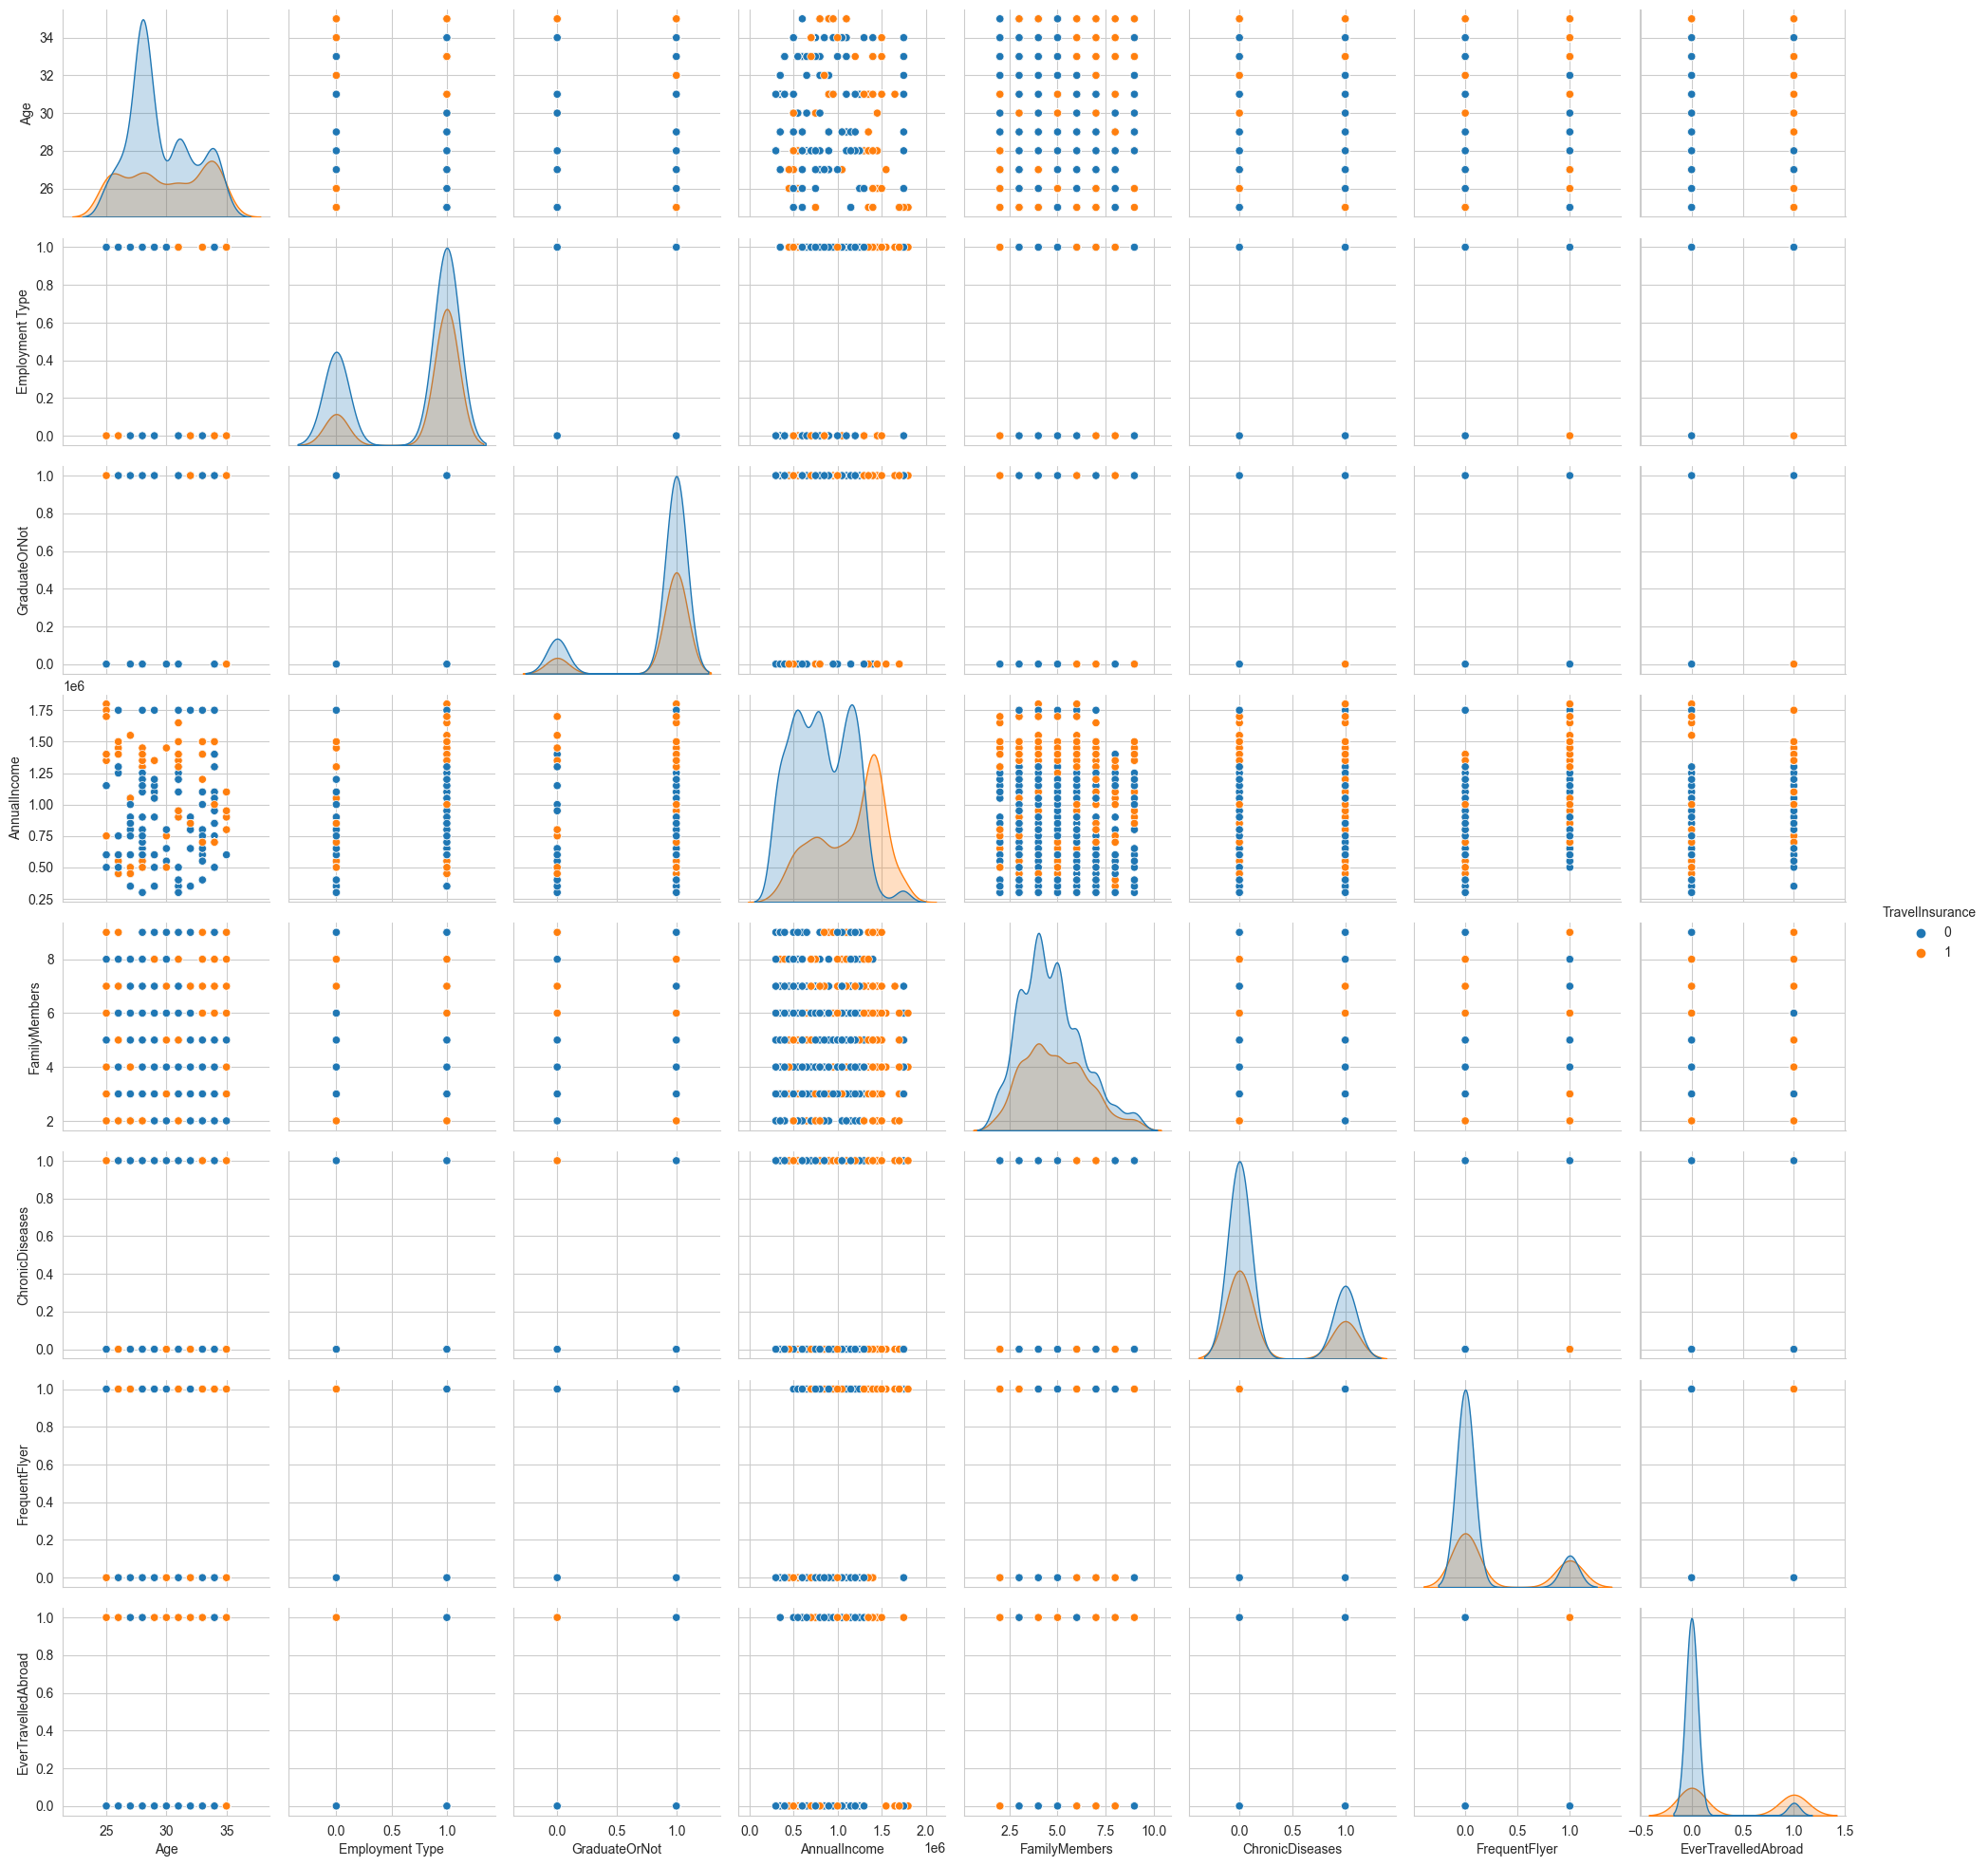

In [75]:
sns.pairplot(df2, hue='TravelInsurance')

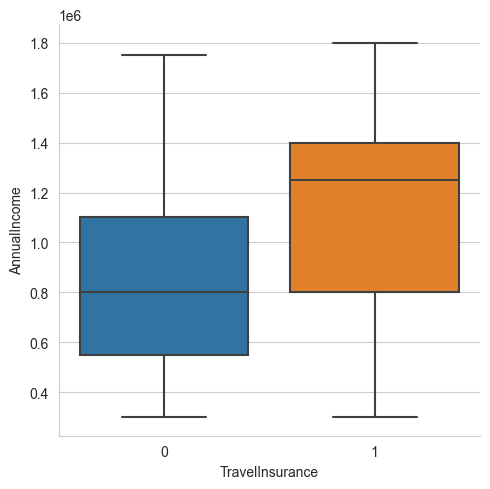

In [76]:
sns.catplot(data = df2, y='AnnualIncome', x='TravelInsurance', kind='box')

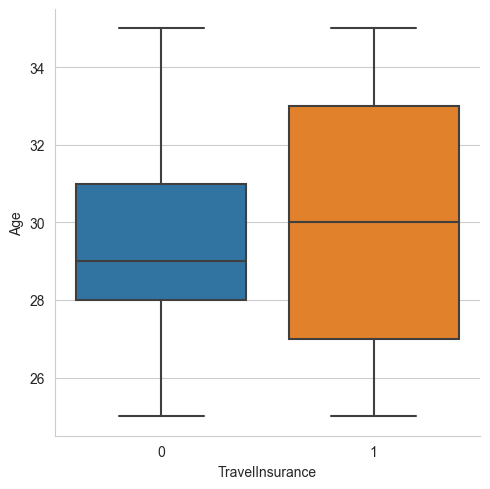

In [77]:
sns.catplot(data = df2, y='Age', x='TravelInsurance', kind='box')

In [78]:
from sklearn.model_selection import train_test_split
X = df2.iloc[:, 0:-1]
Y = df2.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

In [79]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(X_train)
x_test = scale.transform(X_test)

In [80]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20, class_weight='balanced')
rfc.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=20)

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [82]:
y_pred = rfc.predict(x_train)
y_pred_t = rfc.predict(x_test)

In [83]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       829
           1       0.91      0.88      0.89       443

    accuracy                           0.93      1272
   macro avg       0.92      0.92      0.92      1272
weighted avg       0.93      0.93      0.93      1272



In [84]:
confusion_matrix(y_train, y_pred)

array([[788,  41],
       [ 51, 392]], dtype=int64)

In [85]:
print(classification_report(y_test, y_pred_t))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       202
           1       0.77      0.71      0.74       116

    accuracy                           0.82       318
   macro avg       0.81      0.79      0.80       318
weighted avg       0.82      0.82      0.82       318



In [86]:
confusion_matrix(y_test, y_pred_t)

array([[178,  24],
       [ 34,  82]], dtype=int64)

In [87]:
test = pd.read_csv('travel_insurance/test.csv')
test2 = test.copy()

In [88]:
test2.columns

Index(['Customer Id', 'Age', 'Employment Type', 'GraduateOrNot',
       'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')

In [89]:
feature_list = ['GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']
for i in feature_list:
    test2[i].replace({'No':0, 'Yes':1}, inplace=True)
test2['Employment Type'].replace({'Government Sector':0, 'Private Sector/Self Employed':1}, inplace=True)
test2.drop('Customer Id', axis=1, inplace=True)

In [90]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  397 non-null    int64
 1   Employment Type      397 non-null    int64
 2   GraduateOrNot        397 non-null    int64
 3   AnnualIncome         397 non-null    int64
 4   FamilyMembers        397 non-null    int64
 5   ChronicDiseases      397 non-null    int64
 6   FrequentFlyer        397 non-null    int64
 7   EverTravelledAbroad  397 non-null    int64
dtypes: int64(8)
memory usage: 24.9 KB


In [91]:
x_major_test = scale.transform(test2)

In [92]:
result = rfc.predict_proba(x_major_test)
result[:, 1]

array([0.9692076 , 1.        , 0.4       , 1.        , 0.12596317,
       0.2       , 0.55      , 0.48727991, 0.        , 0.1692076 ,
       0.1       , 0.        , 0.        , 0.6       , 0.        ,
       0.25      , 0.208665  , 1.        , 1.        , 0.        ,
       0.5       , 0.23616644, 0.14244027, 0.210862  , 0.        ,
       0.42443367, 0.1       , 0.        , 1.        , 0.05      ,
       0.01361695, 0.1       , 1.        , 1.        , 0.2       ,
       0.41517296, 0.55      , 1.        , 1.        , 0.        ,
       0.4       , 0.14244027, 0.        , 0.        , 0.33383197,
       0.9       , 0.9       , 0.45761323, 0.3       , 0.        ,
       0.2       , 0.7       , 0.32755369, 0.3       , 0.48658145,
       0.        , 0.37760283, 0.06593618, 0.15      , 0.34064839,
       0.22011034, 0.17527437, 0.15      , 0.15675557, 0.08686629,
       0.        , 0.79420016, 0.        , 0.2       , 0.        ,
       0.        , 0.        , 0.        , 0.45      , 1.     

In [93]:
output = pd.DataFrame({'Customer ID':test['Customer Id'], 'prediction':result[:,1]})
output.to_csv('output.csv', index=False)

In [94]:
o = pd.read_csv('output.csv')
o

,Customer ID,prediction
0,Q5OK4L2Q5XNH,0.969208
1,CBHVMVE7TRP5,1.000000
2,9UGHQ91U4F0M,0.400000
3,3UWXWMZK4ZGL,1.000000
4,5CGEMLMBOPES,0.125963
...,...,...
392,3T4IU1ZJNDIA,0.728164
393,N3ON6CQWDU4Z,0.377603
394,LWW08WASNJ2T,0.103476
395,L2RAKTUJP4HS,0.050000


In [95]:
rfc.score(x_test, y_test)

0.8176100628930818